<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


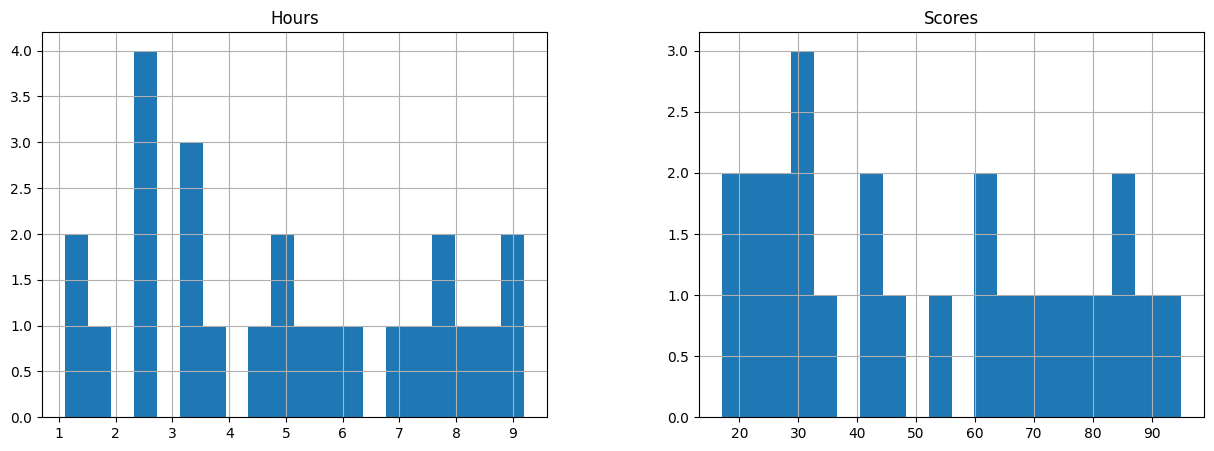

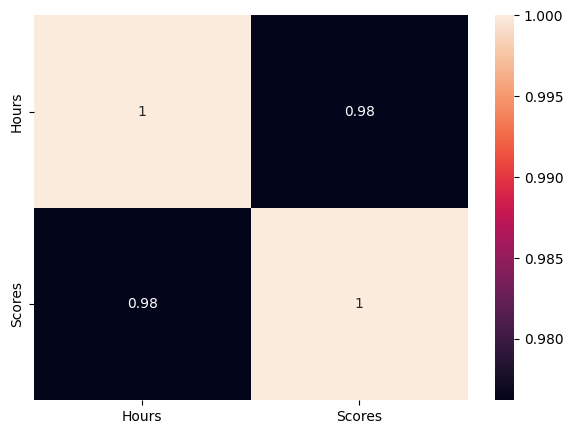

Linear Regression: Accuracy on training Data: 0.952
Linear Regression: Accuracy on test Data: 0.945

Linear Regression: The RMSE of the training set is: 5.558613350226344
Linear Regression: The RMSE of the testing set is: 4.647447612100373
The Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


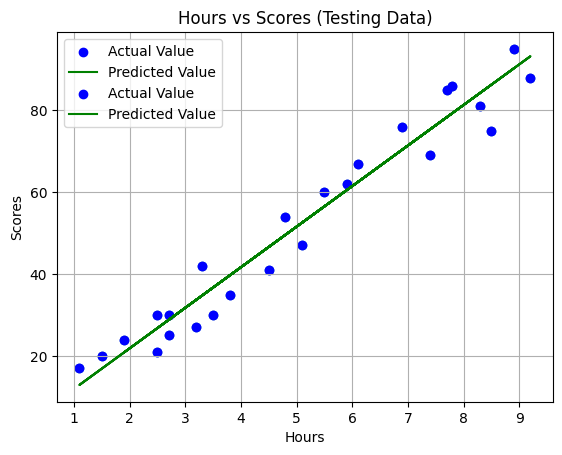

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')





data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()
data.shape
data.columns
data.info()
data.isna().sum()
data.describe()
data.corr()
data.hist(bins = 20,figsize = (15,5));
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores");
y=data["Scores"]
X=data.drop("Scores",axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

# Linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

from sklearn.metrics import mean_squared_error

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

dict={"Actual":y_train,"Predicted":y_train_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()


plt.scatter(X_train,y_train,label="Actual Value",color="blue")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Training Data)")
plt.grid(True)
plt.legend();

#checking for actual vs predicted value

dict={"Actual":y_test,"Predicted":y_test_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()



plt.scatter(X_test,y_test,label="Actual Value",color="blue")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Testing Data)")
plt.grid(True)
plt.legend();

#predicted score if a student studies for 9.25 hrs/ day

result=lr.predict([[9.25]])
print("The Predicted score of student comes to be {:.3f} if a student studies for 9.25 hrs/ day.".format(result[0]))


